In [1]:
import pandas as pd  # For displaying the data after
import matplotlib.pyplot as plt  # for plotting data
from src.twitter_util import get_all_minister_twitter_bios
from src.persistance_util import export_container_to_csv
from config import MINISTER_TWITTER_INFO

In [2]:
minister_bios = get_all_minister_twitter_bios(
    minister_twitter_info=MINISTER_TWITTER_INFO,
    custom_user_fields=[
        "created_at",
        "description",
        "id",
        "location",
        "name",
        "public_metrics",
        "url",
        "username",
        "verified",
    ],
)
print(
    f"INFO: {len(minister_bios)}/{len(MINISTER_TWITTER_INFO)} Twitter accounts of ministers with Twitter handles fetched."
)
export_container_to_csv(container=minister_bios, path="data/minister_bios.csv")

INFO: 13/13 Twitter accounts of ministers with Twitter handles fetched.


In [3]:
minister_df = pd.read_csv("data/minister_bios.csv")
minister_df.head()

,url,description,id,location,username,name,verified,created_at,followers_count,following_count,tweet_count,listed_count,party
0,https://t.co/QyGCyDDccr,"Bundesminister für Digitales und Verkehr, Vors...",20593301,"Schillerstraße 11a, 55116 Mainz",Wissing,Volker Wissing,True,2009-02-11T14:34:58.000Z,31082,998,13159,617,fdp
1,https://t.co/mJgVJTabCr,Bundesminister der Finanzen. Bundesvorsitzende...,122104353,"Berlin, Deutschland",c_lindner,Christian Lindner,True,2010-03-11T16:11:51.000Z,549425,1371,17671,2406,fdp
2,https://t.co/aNTUPwOxBp,"SPD Bundestagsabgeordneter, Bundesgesundheitsm...",3292982985,"Berlin, Deutschland",Karl_Lauterbach,Prof. Karl Lauterbach,True,2015-05-21T14:01:21.000Z,827599,296,9570,2805,spd
3,https://t.co/bR6R0XD5I5,Offizieller Twitter Account von Außenministeri...,1469264387512979461,Berlin,ABaerbock,Außenministerin Annalena Baerbock,True,2021-12-10T11:15:44.000Z,91211,39,7,250,gruene
4,https://t.co/Zu3jph3Ylw,Bundesministerin des Innern und für Heimat | V...,620221740,Hessen,NancyFaeser,Nancy Faeser,True,2012-06-27T16:33:18.000Z,53989,386,1083,339,spd


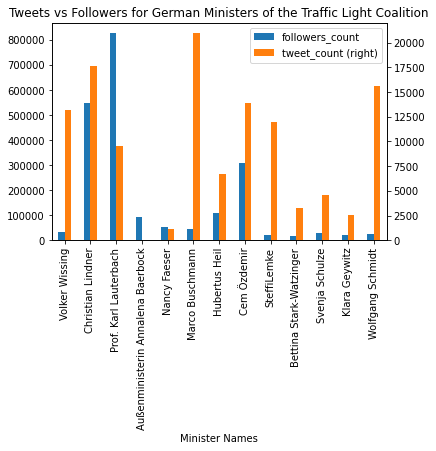

In [4]:
# Some visualization
tweet_ratio_plt = minister_df.plot(
    kind="bar",
    x="name",
    y=["followers_count", "tweet_count"],
    secondary_y="tweet_count",
)
tweet_ratio_plt.set_title(
    "Tweets vs Followers for German Ministers of the Traffic Light Coalition"
)
tweet_ratio_plt.set_xlabel("Minister Names")
plt.show()

In [5]:
party_stats_df = (
    minister_df.groupby(by=["party"])["followers_count", "tweet_count"]
    .mean()
    .sort_values(by=["followers_count", "tweet_count"], ascending=[False, True])
)
party_stats_df

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_23714/2881319713.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  minister_df.groupby(by=["party"])["followers_count", "tweet_count"]


,followers_count,tweet_count
party,,
spd,177483.000000,6678.833333
fdp,160149.000000,13764.750000
gruene,140834.333333,8623.000000


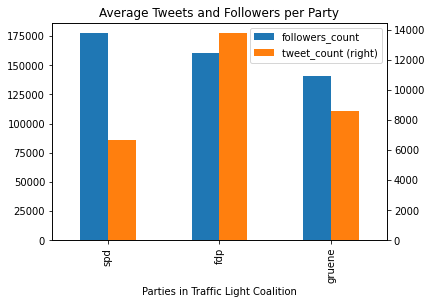

In [6]:
party_stats_plt = party_stats_df.plot(
    kind="bar", y=["followers_count", "tweet_count"], secondary_y="tweet_count"
)
party_stats_plt.set_title("Average Tweets and Followers per Party")
party_stats_plt.set_xlabel("Parties in Traffic Light Coalition")
plt.show()